# Neural Network classification using pyTorch

## 1 Creating the data

In [1]:
import torch.cuda
from sklearn.datasets import make_circles

n_sample=1000

X,y=make_circles(  n_samples =n_sample,noise=0.02,random_state=42)

In [2]:
len(X),len(y)

(1000, 1000)

In [3]:
X[:5],y[:5]

(array([[ 0.76026594,  0.22387823],
        [-0.76722217,  0.1455425 ],
        [-0.80815854,  0.14894355],
        [-0.3760283 ,  0.70320906],
        [ 0.44051035, -0.89761737]]),
 array([1, 1, 1, 1, 0]))

In [4]:
#2 input and 1 output
import pandas as pd
circels=pd.DataFrame({
    "X1": X[:,0],
    "X2": X[:,1],
    "Labels": y
})
circels

,X1,X2,Labels
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0
...,...,...,...
995,0.241536,0.953294,0
996,-0.975298,-0.264479,0
997,-0.141235,-0.801951,1
998,0.675090,-0.754657,0


In [5]:
import matplotlib.pyplot as plt


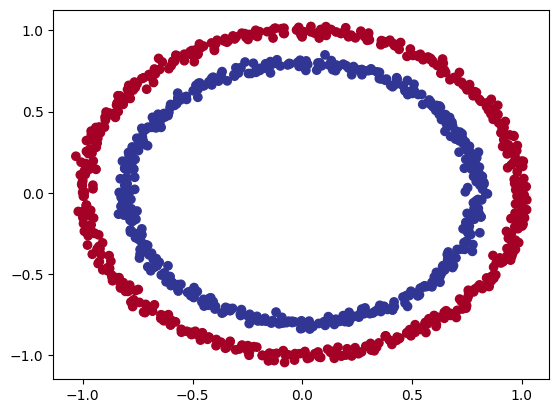

In [6]:
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [7]:
# training and splitting the data

train_split=int(0.8*len(X))

X_train=X[:train_split]
X_test=X[train_split:]

y_train=y[:train_split]
y_test=y[train_split:]

len(X_train),len(y_train),len(y_test),len(X_test)

(800, 800, 200, 200)

## Data exploring

In [8]:
X[:10],y[:10]

(array([[ 0.76026594,  0.22387823],
        [-0.76722217,  0.1455425 ],
        [-0.80815854,  0.14894355],
        [-0.3760283 ,  0.70320906],
        [ 0.44051035, -0.89761737],
        [-0.48452681,  0.66063343],
        [-0.01244985,  0.80221142],
        [ 0.77745843,  0.1418763 ],
        [-0.16613755, -0.79026518],
        [-0.12692063,  1.01115984]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [9]:
X.shape,y.shape

((1000, 2), (1000,))

## turn data into Tensor

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [11]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)


In [12]:
X.dtype,y.dtype

(torch.float32, torch.float32)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

len(X_train),len(y_train),len(X_test),len(y_test)

(800, 800, 200, 200)

## Training and building model

In [14]:
import torch
from torch import nn

In [15]:
class CircleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=5)    #takes input and give output to 5 features
        self.layer_2=nn.Linear(in_features=5,out_features=1)    #takes input from layer1 and give the output

    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.layer_2(self.layer_1(x))



model_0=CircleClassifier().to(device)
model_0


CircleClassifier(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3406, -0.2913],
                      [ 0.1613, -0.2609],
                      [-0.0683, -0.3132],
                      [-0.3123,  0.1087],
                      [-0.5331,  0.5105]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.4012,  0.0543,  0.2914,  0.6731, -0.3371], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2539, -0.4341,  0.2838,  0.3787,  0.0119]], device='cuda:0')),
             ('layer_2.bias', tensor([0.3300], device='cuda:0'))])

In [17]:
model_0_seqeuncial=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1),
).to(device)



In [18]:
model_0_seqeuncial.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3065,  0.6462],
                      [-0.2131,  0.4834],
                      [-0.1341,  0.2927],
                      [-0.6507, -0.6892],
                      [-0.4042,  0.1813]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0064,  0.1164,  0.5408, -0.4544,  0.0963], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0654,  0.1385,  0.0752, -0.0830, -0.1965]], device='cuda:0')),
             ('1.bias', tensor([-0.1895], device='cuda:0'))])

In [19]:
loss_fn=nn.BCEWithLogitsLoss()   #sigmoid+BCE_loss

optimizer=torch.optim.SGD(
    model_0.parameters(),
    lr=0.1
)


In [20]:
def accuracy_fn(y_true, y_preds):
    correct=torch.eq(y_true,y_preds)
    acc=(correct/len(y_preds))*100
    return acc

## Training the model


In [21]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=200
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)
# model_0.to(device)
for epoch in range(epochs):
    model_0.train()

    # Forward Pass
    y_logits=model_0(X_train).squeeze()
    y_preds=torch.round(torch.sigmoid(y_logits))

    #Calculate loss and accuracy
    loss=loss_fn(y_logits,   #expect y_logits not prediction
                 y_train)
    acc=accuracy_fn(y_train, y_preds)


    #optimerzer zero grad
    optimizer.zero_grad()

    #back-propagation
    loss.backward()

    #Gradiennt descent
    optimizer.step()

    #testing our data
    model_0.eval()
    with torch.inference_mode():
        #forward pass
        test_logits=model_0(X_test).squeeze()
        test_preds=torch.round(torch.sigmoid(test_logits))

        #calculate loss
        test_loss=loss_fn(test_logits,  #prediction
                          y_test       #accuracy
                          )
        test_acc=accuracy_fn(y_test, test_preds)
        if epoch%20 == 0:
            print(f"epoch: {epoch},loss: {loss:.4f} ")




epoch: 0,loss: 0.7340 
epoch: 20,loss: 0.7014 
epoch: 40,loss: 0.6968 
epoch: 60,loss: 0.6956 
epoch: 80,loss: 0.6949 
epoch: 100,loss: 0.6944 
epoch: 120,loss: 0.6941 
epoch: 140,loss: 0.6939 
epoch: 160,loss: 0.6937 
epoch: 180,loss: 0.6935 


In [24]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


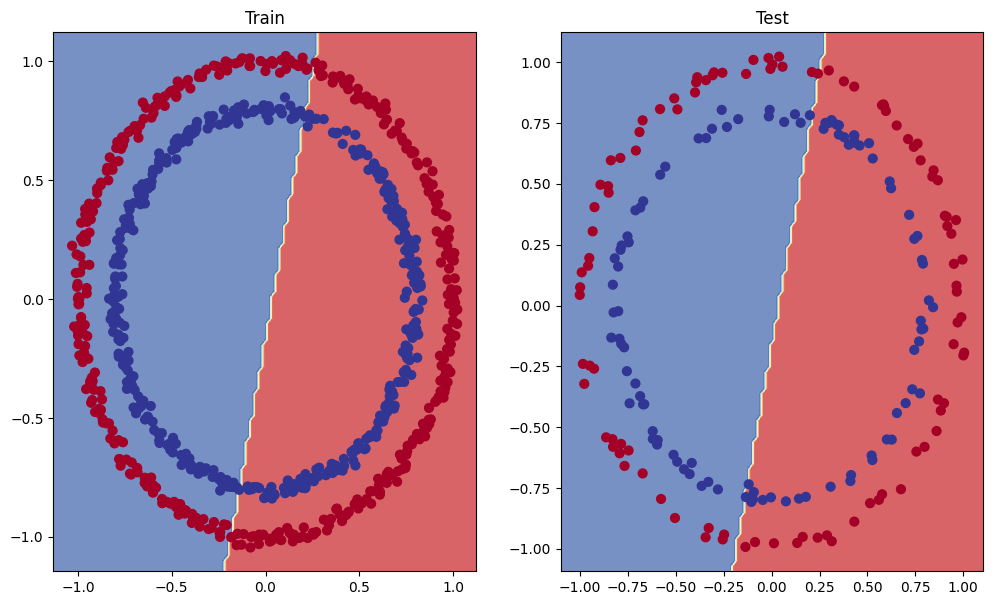

In [33]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Train")

plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


`11:29:00`